In [0]:
!wget https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
import scipy.io
mat = scipy.io.loadmat('mnist.mat')

--2019-10-19 01:17:06--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2019-10-19 01:17:06--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14278089 (14M) [application/octet-stream]
Saving to: ‘mnist.mat’

mnist.mat           100%[===================>]  13.62M  --.-KB/s    in 0.07s   

2019-10-19 01:17:07 (182 MB/s) - ‘mnist.mat’ saved [14278089/14278089]



In [0]:
import numpy as np
import matplotlib.pyplot as plt

trainX = mat['trainX']
testX = mat['testX']
trainX = np.array(trainX, dtype=np.float)
testX = np.array(testX, dtype=np.float)

trainy = mat['trainY']
testy = mat['testY']

In [0]:
# X is data points, y is predicted points
def euclidean(x, y):
  return np.sqrt(np.sum((x-y) ** 2))

def cosine(x, y):
  return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))



In [0]:
X = mat['trainX'][:10000,:]
X = np.array(X, dtype=np.float)
y = mat['trainY'][:,:10000][0]

test_X = mat['testX'][:1000,:]
test_X = np.array(test_X, dtype=np.float)
test_y = mat['testY'][:,:1000][0]

  
xbar = np.mean(X, axis=0)
zero_mean = X - xbar
test_xbar = np.mean(test_X, axis=0)
test_zero = test_X - test_xbar

In [0]:
[u, s, v] = np.linalg.svd(zero_mean)
PCs = v.T
np.shape(PCs)

(784, 784)

In [0]:
components = np.arange(2,31)
accuracy = []

for(basis_ix,basis) in enumerate(components):
  correct = 0
  
  Xprojected = np.matmul(zero_mean, PCs[:,:basis])
  Testprojected = np.matmul(test_zero, PCs[:, :basis])
  
  for ti in range(np.shape(Testprojected)[0]):
    distances = []
    
    for ix in range(np.shape(Xprojected)[0]):
      distance = euclidean(Xprojected[ix, :], Testprojected[ti, :])
      distances.append(distance)
      
    distances = np.array(distances)
    m = np.argmin(distances)
    if(y[m] == test_y[ti]):
      correct += 1
      
  print(correct/np.shape(Testprojected)[0], correct, basis_ix)
  accuracy.append(correct/np.shape(Testprojected)[0])

0.367 367 0
0.37 370 1
0.497 497 2
0.6 600 3
0.677 677 4
0.767 767 5
0.813 813 6
0.833 833 7
0.836 836 8
0.852 852 9
0.875 875 10
0.892 892 11
0.899 899 12
0.903 903 13
0.915 915 14
0.913 913 15
0.909 909 16
0.915 915 17
0.919 919 18
0.922 922 19
0.926 926 20
0.927 927 21
0.926 926 22
0.93 930 23
0.932 932 24
0.932 932 25
0.929 929 26
0.932 932 27
0.928 928 28


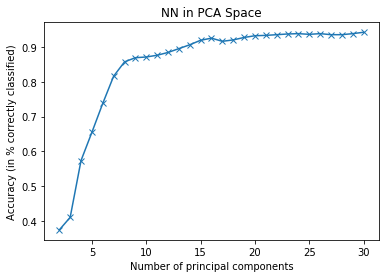

In [0]:
plt.figure()
plt.plot(components, accuracy, 'x-')
plt.title('NN in PCA Space')
plt.xlabel('Number of principal components')
plt.ylabel('Accuracy (in % correctly classified)')
plt.savefig('NN_PCA.jpg')

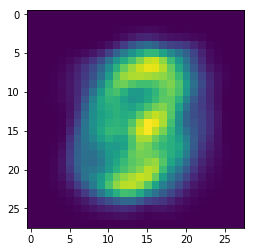

In [0]:
coeffs = np.random.randn(1, 100) * 10

new_face = np.dot(coeffs, PCs[:, :100].T)

np.shape(new_face)

plt.imshow(np.reshape(new_face + xbar, (28,28)))